In [1]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

n = 5 
# 5 is the maximum to see improvements
Npoints = [500,1000,2000,5000,6000,10000,20000,50000,75000,100000,500000,800000,1000000,1500000,2000000]
N = max(Npoints)
sample = 70

x = np.random.randn(N,n)
theta = np.random.randn(n,)
y = np.matmul(x,theta)+np.random.randn(N,)*0.1

In [2]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(2000000, 5)
(2000000, 27)
(2000000, 21)


In [3]:
mean_t = 0.

time_rand = np.zeros((len(Npoints),sample))
iterations_rand = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample):

        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                        xy_sq[:Npoints[k],n+1:]-np.mean(xy_sq[:Npoints[k],n+1:],0), d**3)
        time_rand[k,i] = (timeit.default_timer()-tic)*1000
        iterations_rand[k,i] = iterations

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1

        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED

        mean_t += time_rand[k,i]
        print("sample = ", i)
        print("time = ", time_rand[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
        
    print("N = "+str(Npoints[k])) 
    
    mean_t = 0.
    
mean_t = np.mean(time_rand,1)
min_t = np.min(time_rand,1)
max_t = np.max(time_rand,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
ERROR: NO convergence
ERROR: NO convergence
sample =  0
time =  46.164023999999415 ms
mean time =  46.164023999999415 ms
ERROR: NO convergence
ERROR: NO convergence
sample =  1
time =  30.929335999999807 ms
mean time =  38.54667999999961 ms
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
sample =  2
time =  50.694675000002576 ms
mean time =  42.596011666667266 ms
sample =  3
time =  10.475356000000602 ms
mean time =  34.5658477500006 ms
ERROR: NO convergence
ERROR: NO convergence
sample =  4
time =  40.938713000002735 ms
mean time =  35.84042080000103 ms
sample =  5
time =  11.236506000003033 ms
mean time =  31.739768333334695 ms
sample =  6
time =  7.434056000001021 ms
mean time =  28.267523714287027 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:373: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:398: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)
/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
sample =  7
time =  140.7254219999956 ms
mean time =  42.3247610000006 ms
sample =  8
time =  8.294189999993762 ms
mean time =  38.54358644444429 ms
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
sample =  9
time =  142.98874099999637 ms
mean time =  48.98810189999949 ms
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
sample =  10
time =  140.86759799999982 ms
mean time =  57.340783363635886 ms
ERROR: NO convergence
ERROR: NO convergence
sample =  11
time =  33.56632199999865 ms
mean time =  55.35957824999945 ms
sample =  12
time =  6.458649999999011 ms
mean time =  51.5979683846148 ms
ERROR: numerical instability
ERROR: NO c

In [4]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

sample_FC = 15
time_FC = np.zeros((len(Npoints),sample_FC))

for k in range(len(Npoints)):
    
    for i in range(sample_FC):
        tic = timeit.default_timer()
        Fast_Caratheodory(xy_sq[:Npoints[k],n+1:],np.ones(Npoints[k]),d+1)
        time_FC[k,i] = (timeit.default_timer()-tic)*1000
    print("N = "+str(Npoints[k])) 

print("mean FC = ", np.mean(time_FC,1), " ms")
print("std FC = ", np.std(time_FC,1))

N = 500
N = 1000
N = 2000
N = 5000
N = 6000
N = 10000
N = 20000
N = 50000
N = 75000
N = 100000
N = 500000
N = 800000
N = 1000000
N = 1500000
N = 2000000
mean FC =  [  18.1365638    23.71269547   27.37228713   33.72265073   34.2363162
   38.30239067   44.91331147   58.36176353   74.6184558    86.40754167
  260.53584113  433.59579     509.596214    825.18793167 1065.03563793]  ms
std FC =  [ 1.41318129  1.73668265  1.67202882  1.69254796  1.58420832  1.82262584
  2.30818557  2.7332292   2.31948073  5.53533137  8.32302016  3.92600518
  6.62397932  8.46631917 33.87465182]


In [5]:
print("Probability to be faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T,1)/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(time_rand<np.mean(time_FC,1)[np.newaxis].T/4,1)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand,1))

Probability to be faster =  [40.         44.28571429 71.42857143 78.57142857 78.57142857 67.14285714
  7.14285714  1.42857143  1.42857143  0.          0.          0.
  0.          0.          0.        ] %
Probability to be 4x faster =  [1.42857143 1.42857143 0.         0.         1.42857143 0.
 1.42857143 0.         0.         0.         0.         0.
 0.         0.         0.        ] %
Standard deviation =  [  36.15708261   22.9641107    16.88850202   26.6508654    18.91167234
   22.43054035   43.99563915   74.69908898   96.6335699   113.04978402
  569.33785556 1256.79796549 1418.38359753 2504.3223589  3184.3320544 ]


In [6]:
mean_t = 0.

time_TL = np.zeros((len(Npoints),sample_FC))
min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))


for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample_FC):
        x_cp = np.copy(xy_sq[:Npoints[k],n+1:])
        
        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, _, _ = rb.Tchernychova_Lyons(x_cp)
        time_TL[k,i] = (timeit.default_timer()-tic)*1000

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1

        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED
        
        mean_t += time_TL[k,i]
        print("sample = ", i)
        print("time = ", time_TL[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k])) 
    mean_t = 0.
    
mean_t = np.mean(time_TL,1)
min_t = np.min(time_TL,1)
max_t = np.max(time_TL,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
sample =  0
time =  10.309135999705177 ms
mean time =  10.309135999705177 ms
sample =  1
time =  10.85938400001396 ms
mean time =  10.584259999859569 ms
sample =  2
time =  10.326044000066759 ms
mean time =  10.498187999928632 ms
sample =  3
time =  7.719455999904312 ms
mean time =  9.803504999922552 ms
sample =  4
time =  7.65592400011883 ms
mean time =  9.373988799961808 ms
sample =  5
time =  6.918259000030957 ms
mean time =  8.964700499973333 ms
sample =  6
time =  7.0355199995901785 ms
mean time =  8.689103285632882 ms
sample =  7
time =  6.914328999755526 ms
mean time =  8.467256499898212 ms
sample =  8
time =  7.246886000302766 ms
mean time =  8.33165977772094 ms
sample =  9
time =  6.903711000177282 ms
mean time =  8.188864899966575 ms
sample =  10
time =  6.776285000341886 ms
mean time =  8.06044854545524 ms
sample =  11
time =  7.834856000044965 ms
mean time =  8.04164916667105 ms
sample =  12
time =  6.670244999895658 ms
mean time =  7.936156538457558 ms
sample =  13

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:739: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  6
time =  16.316741000082402 ms
mean time =  10.293703285892011 ms
sample =  7
time =  11.032684000383597 ms
mean time =  10.38607587520346 ms
sample =  8
time =  9.268153999983042 ms
mean time =  10.261862333512303 ms
sample =  9
time =  9.895152000353846 ms
mean time =  10.225191300196457 ms
sample =  10
time =  9.150795000095968 ms
mean time =  10.12751890927823 ms
sample =  11
time =  8.451620999949228 ms
mean time =  9.98786075016748 ms
sample =  12
time =  8.263725000233535 ms
mean time =  9.855234923249485 ms
sample =  13
time =  8.406786000250577 ms
mean time =  9.75177428589242 ms
sample =  14
time =  7.9600479998589435 ms
mean time =  9.632325866823521 ms
N=1000
N = 2000
sample =  0
time =  9.980987000290042 ms
mean time =  9.980987000290042 ms
sample =  1
time =  9.899218000100518 ms
mean time =  9.94010250019528 ms
sample =  2
time =  10.134155000287137 ms
mean time =  10.004786666892565 ms
sample =  3
time =  9.485619999850314 ms
mean time =  9.874995000132003 ms

In [7]:
mean_t = 0.

time_log = np.zeros((len(Npoints),sample))

min_t = np.zeros(len(Npoints))
max_t = np.zeros(len(Npoints))

for k in range(len(Npoints)):
    print("N = "+str(Npoints[k])) 
    
    COV = np.matmul(x[:Npoints[k],:].T,x[:Npoints[k],:])/Npoints[k]
    
    for i in range(sample):
        x_cp = np.copy(xy_sq[:Npoints[k],n+1:])
        
        tic = timeit.default_timer()
        w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
        time_log[k,i] = (timeit.default_timer()-tic)*1000

        ################ CHECK THE BARYCENTER IS THE SAME
        COV_recomb = np.zeros(COV.shape)
        jj = 0 
        for j in idx_star:
            tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
            COV_recomb += tmp * w_star[jj]
            jj += 1
        
        assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
        ################ CHECK FINISHED
        
        mean_t += time_log[k,i]
        print("sample = ", i)
        print("time = ", time_log[k,i], "ms")
        print("mean time = ", mean_t/(i+1), "ms")
    print("N="+str(Npoints[k])) 
    mean_t = 0.
    
mean_t = np.mean(time_log,1)
min_t = np.min(time_log,1)
max_t = np.max(time_log,1)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

N = 500
sample =  0
time =  8.458283999971172 ms
mean time =  8.458283999971172 ms
sample =  1
time =  4.374971999823174 ms
mean time =  6.416627999897173 ms
sample =  2
time =  33.11366900015855 ms
mean time =  15.315641666650967 ms
sample =  3
time =  8.091074999811099 ms
mean time =  13.509499999941 ms
sample =  4
time =  89.11854300004052 ms
mean time =  28.631308599960903 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:373: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_CODE Recombination/Official recomb/recombination.py:398: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  5
time =  69.74008499992124 ms
mean time =  35.48277133328762 ms
sample =  6
time =  5.656544999965263 ms
mean time =  31.221881857098715 ms
sample =  7
time =  37.684987999909936 ms
mean time =  32.02977012495012 ms
sample =  8
time =  22.63124199998856 ms
mean time =  30.98548922217661 ms
sample =  9
time =  110.28467400001318 ms
mean time =  38.91540769996027 ms
sample =  10
time =  31.044667000060144 ms
mean time =  38.19988581815117 ms
sample =  11
time =  27.273494999917602 ms
mean time =  37.28935324996504 ms
sample =  12
time =  45.69619000039893 ms
mean time =  37.93603299999841 ms
sample =  13
time =  9.723767999730626 ms
mean time =  35.920871214265 ms
sample =  14
time =  69.3350440001268 ms
mean time =  38.14848273332245 ms
sample =  15
time =  21.79354700001568 ms
mean time =  37.12629924999078 ms
sample =  16
time =  80.35648399982165 ms
mean time =  39.66925129409848 ms
sample =  17
time =  91.61867300008453 ms
mean time =  42.55533027776437 ms
sample =  18
ti

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  20
time =  82.94533299977047 ms
mean time =  45.228028571381444 ms
sample =  21
time =  10.031899000296107 ms
mean time =  43.628204499968476 ms
sample =  22
time =  8.554402999834565 ms
mean time =  42.103256608658306 ms
sample =  23
time =  50.855361000230914 ms
mean time =  42.46792762497383 ms
sample =  24
time =  11.326791999636043 ms
mean time =  41.22228219996032 ms
sample =  25
time =  32.566023000072164 ms
mean time =  40.88934915381078 ms
sample =  26
time =  9.618821999993088 ms
mean time =  39.73118148144716 ms
sample =  27
time =  36.08982900004776 ms
mean time =  39.60113317854003 ms
sample =  28
time =  88.29489100025967 ms
mean time =  41.28022827584071 ms
sample =  29
time =  99.59318199980771 ms
mean time =  43.22399339997295 ms
sample =  30
time =  103.95882299962977 ms
mean time =  45.183181451574775 ms
sample =  31
time =  45.4787479998231 ms
mean time =  45.19241790620754 ms
sample =  32
time =  68.90962499983289 ms
mean time =  45.91112115146891 ms
samp

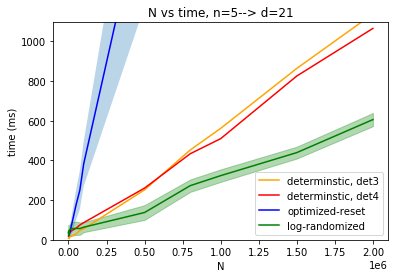

In [9]:
import matplotlib.pyplot as plt

plt.plot(Npoints,np.mean(time_TL,1), '-', label="determinstic, det3", color='orange')
plt.plot(Npoints,np.mean(time_FC,1), '-', label="determinstic, det4", color='red')

plt.plot(Npoints,np.mean(time_rand,1), '-', label="optimized-reset", color='blue')
error = np.std(time_rand,axis=1)
plt.fill_between(Npoints, 
                 np.mean(time_rand,1)-error, 
                 np.mean(time_rand,1)+error, 
                 alpha=0.3)

plt.plot(Npoints,np.mean(time_log,1), '-', label="log-randomized", color='green')
plt.fill_between(Npoints, 
                 np.mean(time_log,1)-np.std(time_log,1), 
                 np.mean(time_log,1)+np.std(time_log,1), 
                 alpha=0.3, color='green')

plt.xlabel('N')
plt.ylabel('time (ms)')

plt.ylim([0,np.max(time_FC)])

plt.title('N vs time, n='+str(n)+'--> d='+str(d))
# plt.xscale('log') 
# plt.yscale('log') 
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

# fig.tight_layout()
# plt.savefig('Synthetic_cov_Nvsn_n5d21.pdf', bbox_inches='tight')
plt.show()
